**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report


**LOAD THE DATASET**

In [3]:
file_path = '/content/covid_19_clean_complete.csv'
data = pd.read_csv(file_path)

print(data.head())

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


**DATA PREPROCESSING**

In [4]:
print("Missing Values:\n", data.isnull().sum())

if 'Province/State' in data.columns:
    data.drop(columns=['Province/State'], inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.fillna(0, inplace=True)
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']

print("Data Types:\n", data.dtypes)
print("Sample Data:\n", data.head())

Missing Values:
 Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64
Data Types:
 Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object
Sample Data:
   Country/Region       Lat       Long       Date  Confirmed  Deaths  \
0    Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1        Albania  41.15330  20.168300 2020-01-22          0       0   
2        Algeria  28.03390   1.659600 2020-01-22          0       0   
3        Andorra  42.50630   1.521800 2020-01-22          0       0   
4         Angola -11.20270  17.873900

**EXPLORATORY DATA ANALYSIS**

1. Aggregated Global COVID-19 Data



Aggregated Global COVID-19 Data:
            Confirmed  Deaths  Recovered   Active
Date                                             
2020-01-22        555      17         28      510
2020-01-23        654      18         30      606
2020-01-24        941      26         36      879
2020-01-25       1434      42         39     1353
2020-01-26       2118      56         52     2010
...               ...     ...        ...      ...
2020-07-23   15510481  633506    8710969  6166006
2020-07-24   15791645  639650    8939705  6212290
2020-07-25   16047190  644517    9158743  6243930
2020-07-26   16251796  648621    9293464  6309711
2020-07-27   16480485  654036    9468087  6358362

[188 rows x 4 columns]


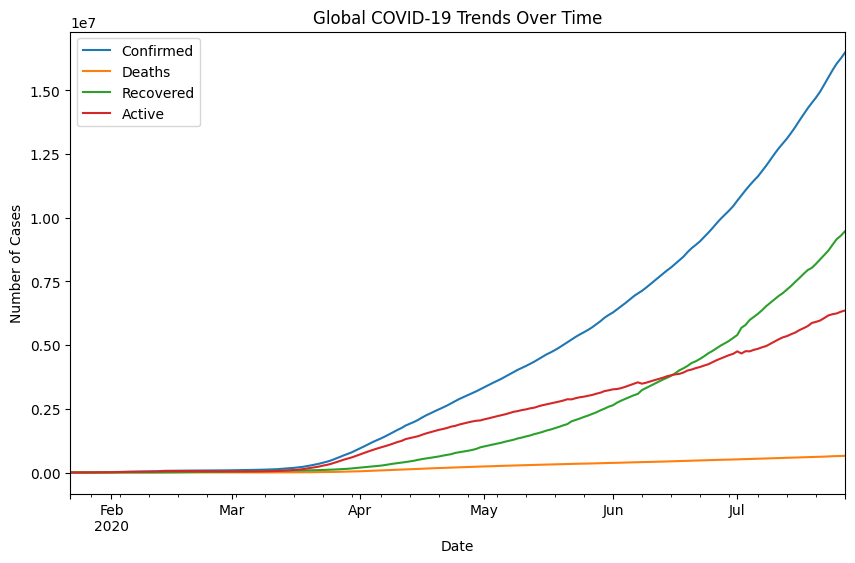

In [5]:
global_data = data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
print("Aggregated Global COVID-19 Data:")
print(global_data)

plt.figure(figsize=(10, 6))
global_data.plot(ax=plt.gca())
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

2. Top 10 Affected Countries

Top 10 Affected Countries:
                 Confirmed  Deaths  Recovered   Active
Country/Region                                       
US                4290259  148011    1325804  2816444
Brazil            2442375   87618    1846641   583080
India             1480073   33408     951166   495499
Russia             816680   13334     602249   245382
South Africa       452529    7067     274925   173590
Mexico             395489   44022     303810    53572
Peru               389717   18418     272547   108616
Chile              347923    9187     319954    82961
United Kingdom     300111   45759        533   254352
Iran               293606   15912     255144    34887


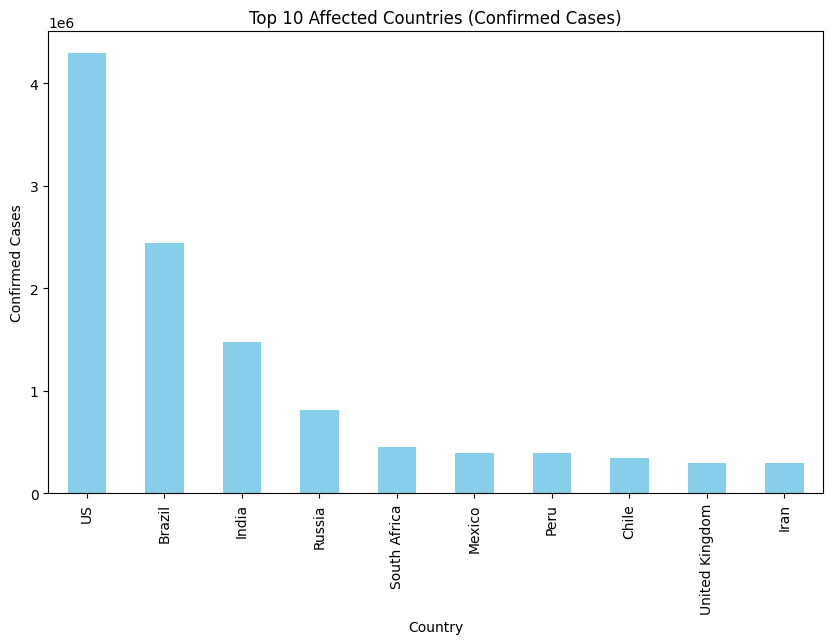

In [6]:
country_data = data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].max().sort_values('Confirmed', ascending=False)
print("Top 10 Affected Countries:\n", country_data.head(10))

plt.figure(figsize=(10, 6))
country_data.head(10)['Confirmed'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Affected Countries (Confirmed Cases)')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.show()

3. Top 10 Countries with the Most Active Cases

Top 10 Countries with the Most Active Cases:
                 Confirmed  Deaths  Recovered   Active
Country/Region                                       
US                4290259  148011    1325804  2816444
Brazil            2442375   87618    1846641   583080
India             1480073   33408     951166   495499
United Kingdom     300111   45759        533   254352
Russia             816680   13334     602249   245382
South Africa       452529    7067     274925   173590
Colombia           257101    8777     131161   117163
Pakistan           274289    5842     241026   108642
Peru               389717   18418     272547   108616
Italy              246286   35112     198593   108257


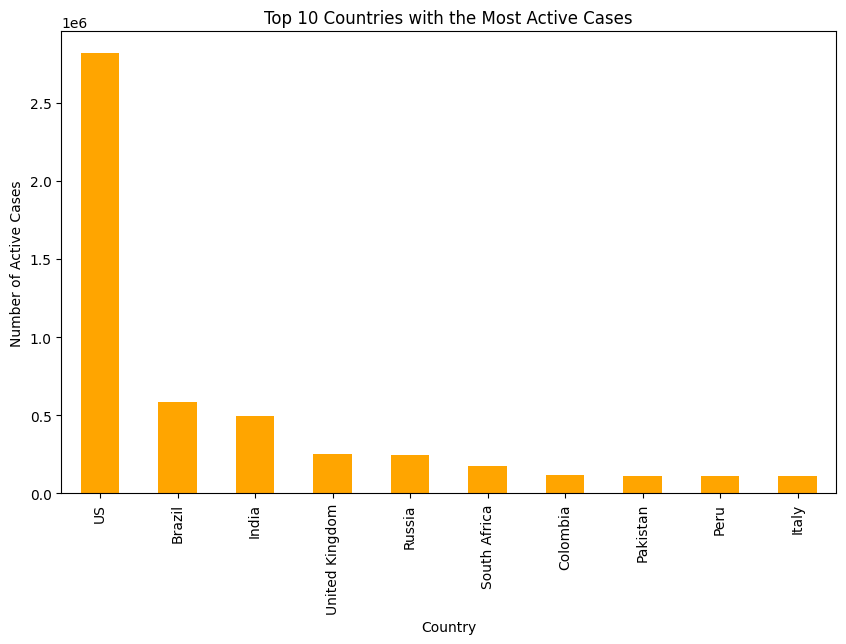

In [7]:
top_active = country_data.sort_values(by='Active', ascending=False).head(10)
print("Top 10 Countries with the Most Active Cases:\n", top_active)

plt.figure(figsize=(10, 6))
top_active['Active'].plot(kind='bar', color='orange')
plt.title('Top 10 Countries with the Most Active Cases')
plt.xlabel('Country')
plt.ylabel('Number of Active Cases')
plt.show()

4. Daily New Cases and Deaths

Daily New Cases and Deaths:
             New Cases  New Deaths
Date                             
2020-01-22        NaN         NaN
2020-01-23       99.0         1.0
2020-01-24      287.0         8.0
2020-01-25      493.0        16.0
2020-01-26      684.0        14.0


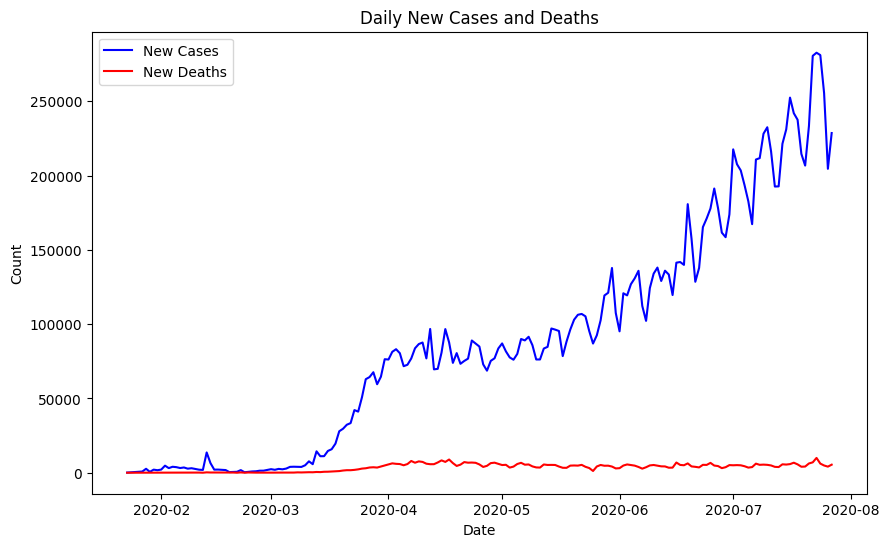

In [8]:
global_data['New Cases'] = global_data['Confirmed'].diff()
global_data['New Deaths'] = global_data['Deaths'].diff()
print("Daily New Cases and Deaths:\n", global_data[['New Cases', 'New Deaths']].head())

plt.figure(figsize=(10, 6))
plt.plot(global_data.index, global_data['New Cases'], label='New Cases', color='blue')
plt.plot(global_data.index, global_data['New Deaths'], label='New Deaths', color='red')
plt.title('Daily New Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


5. Top 10 Countries with the Highest Death Rate

Top 10 Countries with the Highest Death Rate:
                 Confirmed  Deaths  Recovered  Active  Death Rate (%)
Country/Region                                                      
Yemen                1691     483        833     580       28.562980
United Kingdom     300111   45759        533  254352       15.247358
Belgium             66428    9822      17452   39154       14.785934
France             208665   30096      72408  107072       14.423118
Italy              246286   35112     198593  108257       14.256596
Hungary              4448     596       3329    2054       13.399281
Netherlands         53151    6141        102   47010       11.553875
Mexico             395489   44022     303810   53572       11.131030
Spain              272421   28752     150376  101617       10.554252
Western Sahara         10       1          8       6       10.000000


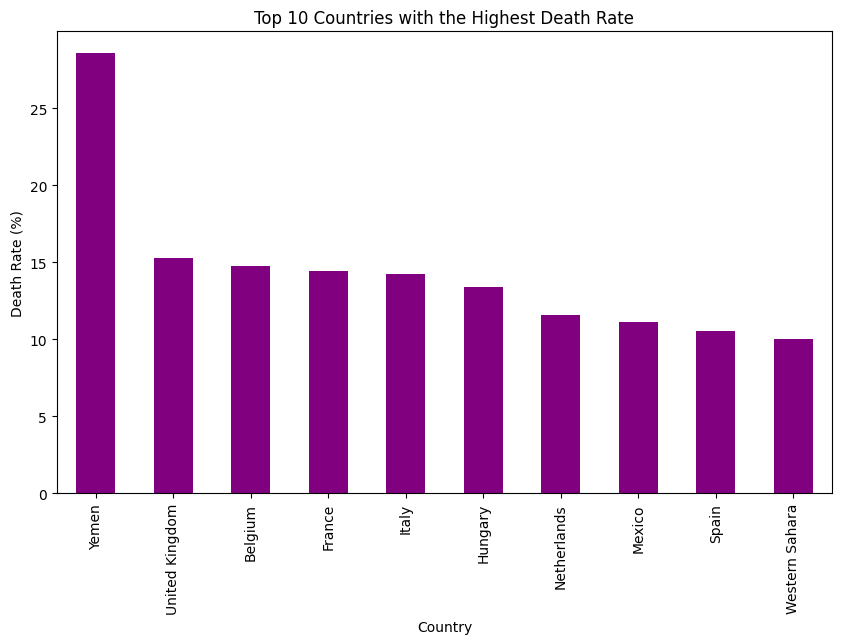

In [9]:
country_data['Death Rate (%)'] = (country_data['Deaths'] / country_data['Confirmed']) * 100
top_death_rate = country_data.sort_values(by='Death Rate (%)', ascending=False).head(10)
print("Top 10 Countries with the Highest Death Rate:\n", top_death_rate)

plt.figure(figsize=(10, 6))
top_death_rate['Death Rate (%)'].plot(kind='bar', color='purple')
plt.title('Top 10 Countries with the Highest Death Rate')
plt.xlabel('Country')
plt.ylabel('Death Rate (%)')
plt.show()

6. Top 10 Countries with the Highest Recovery Rate

Top 10 Countries with the Highest Recovery Rate:
                 Confirmed  Deaths  Recovered  Active  Death Rate (%)  \
Country/Region                                                         
Grenada                23       0         23      14        0.000000   
Holy See               12       0         12      10        0.000000   
Dominica               18       0         18      14        0.000000   
Djibouti             5059      58       4977    2390        1.146472   
Iceland              1854      10       1823    1096        0.539374   
Brunei                141       3        138     109        2.127660   
New Zealand          1557      22       1514     929        1.412974   
Qatar              109597     165     106328   35634        0.150552   
Malaysia             8904     124       8601    2596        1.392633   
Liechtenstein          86       2         83      46        2.325581   

                Recovery Rate (%)  
Country/Region                     
Grenada      

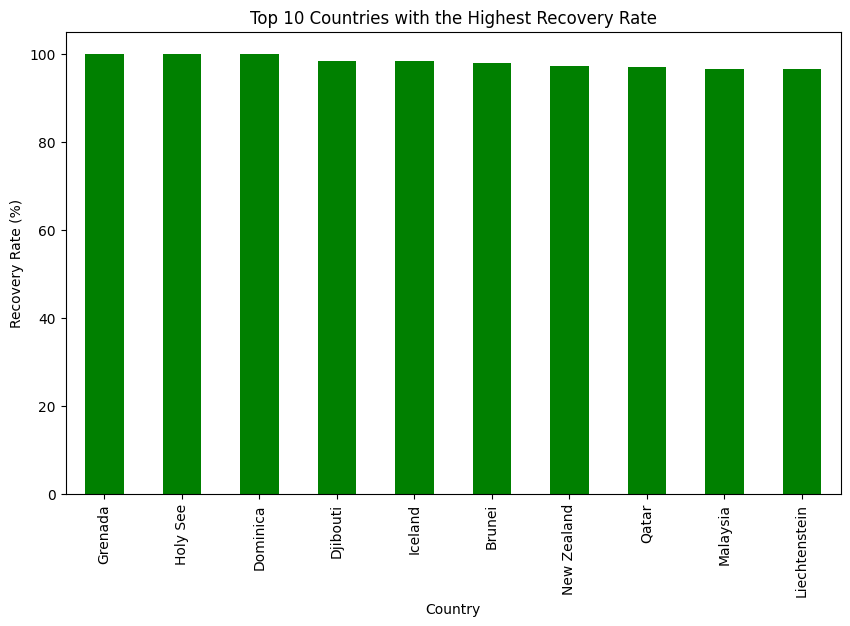

In [10]:
country_data['Recovery Rate (%)'] = (country_data['Recovered'] / country_data['Confirmed']) * 100
top_recovery_rate = country_data.sort_values(by='Recovery Rate (%)', ascending=False).head(10)
print("Top 10 Countries with the Highest Recovery Rate:\n", top_recovery_rate)

plt.figure(figsize=(10, 6))
top_recovery_rate['Recovery Rate (%)'].plot(kind='bar', color='green')
plt.title('Top 10 Countries with the Highest Recovery Rate')
plt.xlabel('Country')
plt.ylabel('Recovery Rate (%)')
plt.show()

7. Active Cases Distribution by Continent

Active Cases by Continent:
 Continent
Asia              15987913
North America    156981121
South America     31094060
Name: Active, dtype: int64


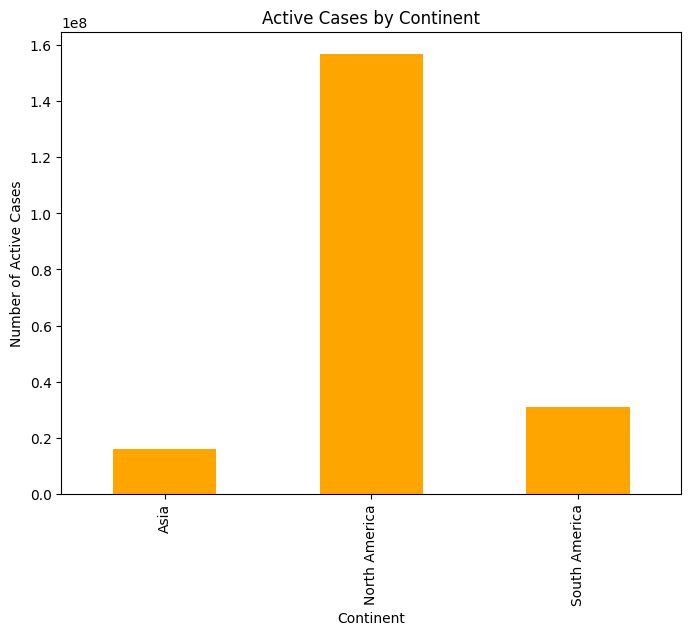

In [11]:
if 'Continent' not in data.columns:
    data['Continent'] = data['Country/Region'].map({
        'US': 'North America', 'India': 'Asia', 'Brazil': 'South America',
    })

continent_data = data.groupby('Continent')['Active'].sum()
print("Active Cases by Continent:\n", continent_data)

plt.figure(figsize=(8, 6))
continent_data.plot(kind='bar', color='orange')
plt.title('Active Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Active Cases')
plt.show()

8. Daily Growth Rate

Daily Growth Rate:
 Date
2020-01-22          NaN
2020-01-23    17.837838
2020-01-24    43.883792
2020-01-25    52.391073
2020-01-26    47.698745
Name: Growth Rate (%), dtype: float64


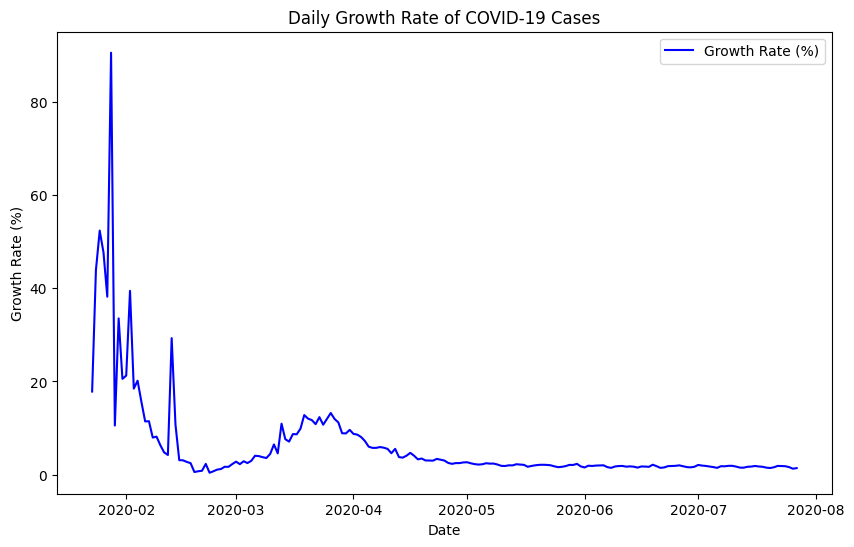

In [12]:
global_data['Growth Rate (%)'] = global_data['Confirmed'].pct_change() * 100
print("Daily Growth Rate:\n", global_data['Growth Rate (%)'].head())

plt.figure(figsize=(10, 6))
plt.plot(global_data.index, global_data['Growth Rate (%)'], label='Growth Rate (%)', color='blue')
plt.title('Daily Growth Rate of COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.show()

9. Cumulative Deaths and Recoveries

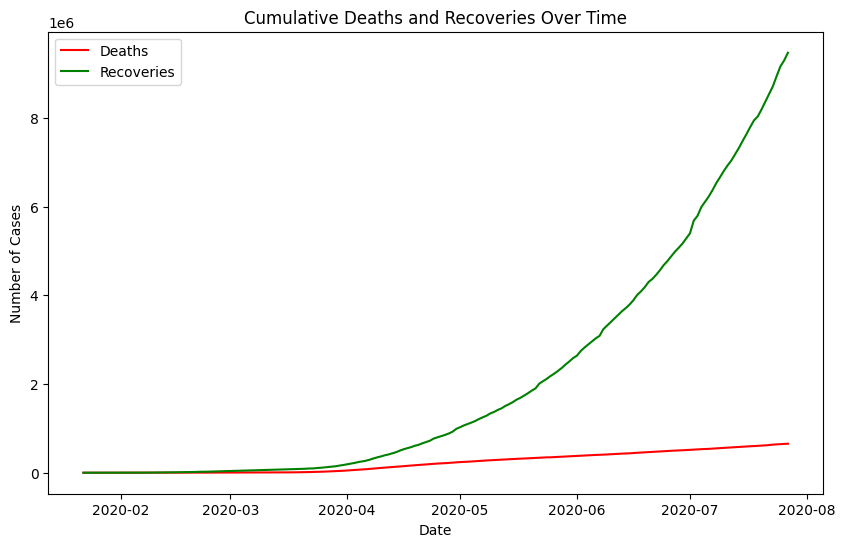

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(global_data.index, global_data['Deaths'], label='Deaths', color='red')
plt.plot(global_data.index, global_data['Recovered'], label='Recoveries', color='green')
plt.title('Cumulative Deaths and Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

10. New Recoveries Over Time

Daily New Recoveries:
 Date
2020-01-22     NaN
2020-01-23     2.0
2020-01-24     6.0
2020-01-25     3.0
2020-01-26    13.0
Name: New Recoveries, dtype: float64


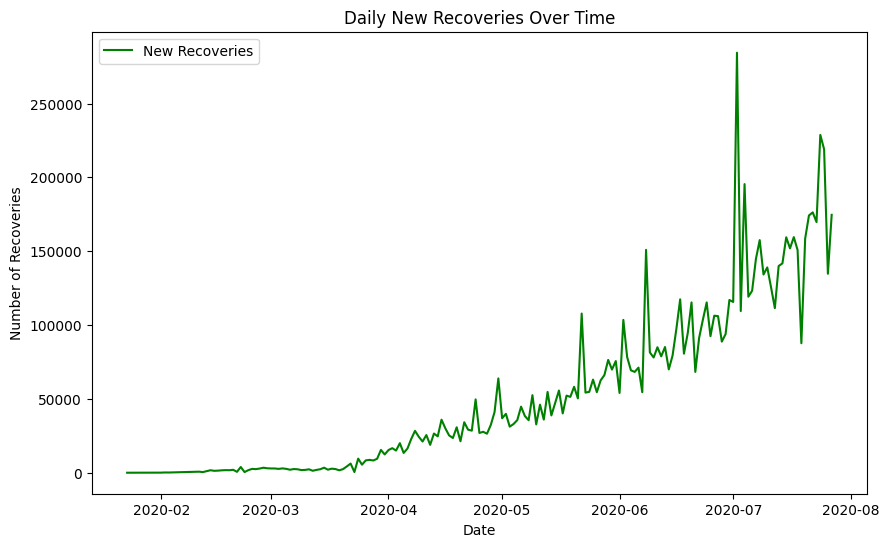

In [14]:
global_data['New Recoveries'] = global_data['Recovered'].diff()
print("Daily New Recoveries:\n", global_data['New Recoveries'].head())

plt.figure(figsize=(10, 6))
plt.plot(global_data.index, global_data['New Recoveries'], label='New Recoveries', color='green')
plt.title('Daily New Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Recoveries')
plt.legend()
plt.show()


11. Confirmed vs Deaths Scatter Plot

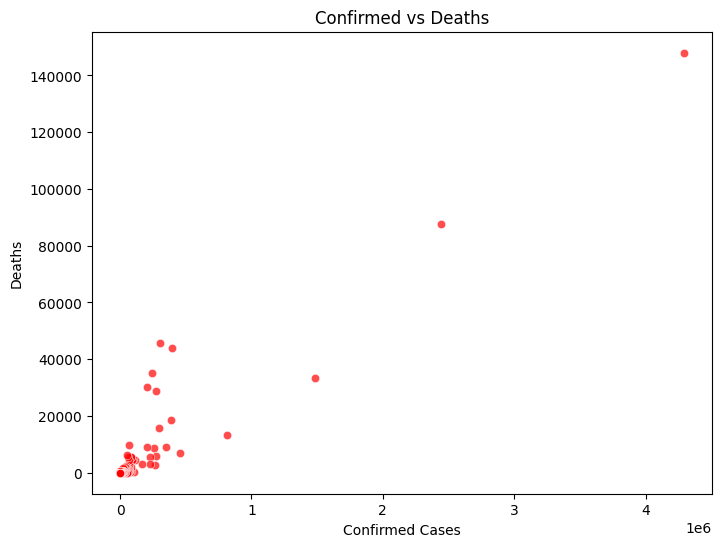

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=country_data, x='Confirmed', y='Deaths', alpha=0.7, color='red')
plt.title('Confirmed vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()

12. Top 10 Countries with Lowest Death Rates

Top 10 Countries with Lowest Death Rates:
                 Confirmed  Deaths  Recovered  Active  Death Rate (%)  \
Country/Region                                                         
Singapore           50838      27      45692   20799        0.053110   
Qatar              109597     165     106328   35634        0.150552   
Uganda               1128       2       1071     546        0.177305   
Nepal               18752      48      13754   10341        0.255973   
Rwanda               1879       5        975     899        0.266099   
Bahrain             39482     141      36110    5727        0.357125   
Sri Lanka            2805      11       2121     947        0.392157   
Namibia              1843       8        101    1734        0.434075   
Maldives             3369      15       2547    1389        0.445236   
Ghana               33624     168      29801    8585        0.499643   

                Recovery Rate (%)  
Country/Region                     
Singapore           

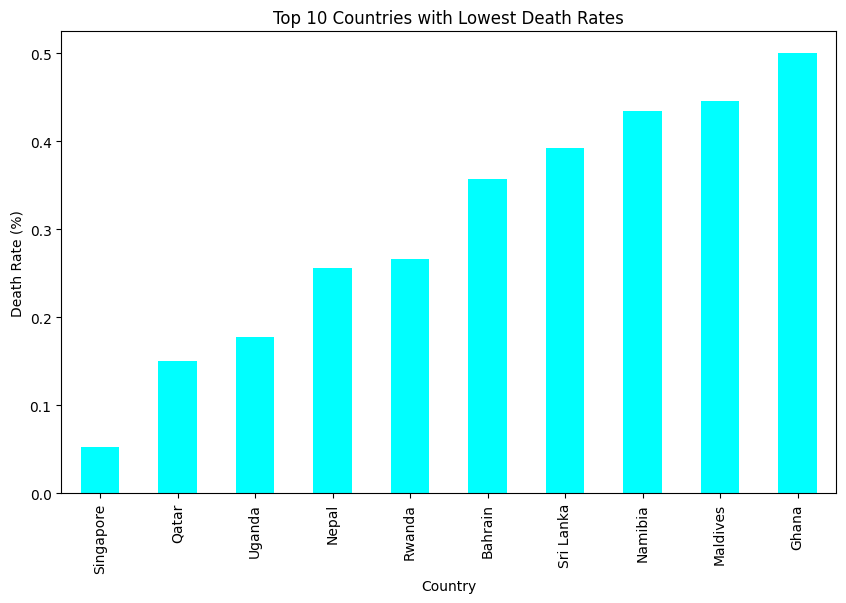

In [16]:
low_death_rate = country_data[country_data['Confirmed'] > 1000].sort_values(by='Death Rate (%)').head(10)
print("Top 10 Countries with Lowest Death Rates:\n", low_death_rate)

plt.figure(figsize=(10, 6))
low_death_rate['Death Rate (%)'].plot(kind='bar', color='cyan')
plt.title('Top 10 Countries with Lowest Death Rates')
plt.xlabel('Country')
plt.ylabel('Death Rate (%)')
plt.show()

13. Heatmap of Confirmed Cases by Country Over Time

Heatmap Data Sample:
 Date            2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
Country/Region                                                               
Afghanistan              0           0           0           0           0   
Albania                  0           0           0           0           0   
Algeria                  0           0           0           0           0   
Andorra                  0           0           0           0           0   
Angola                   0           0           0           0           0   

Date            2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  \
Country/Region                                                               
Afghanistan              0           0           0           0           0   
Albania                  0           0           0           0           0   
Algeria                  0           0           0           0           0   
Andorra                  0           0   

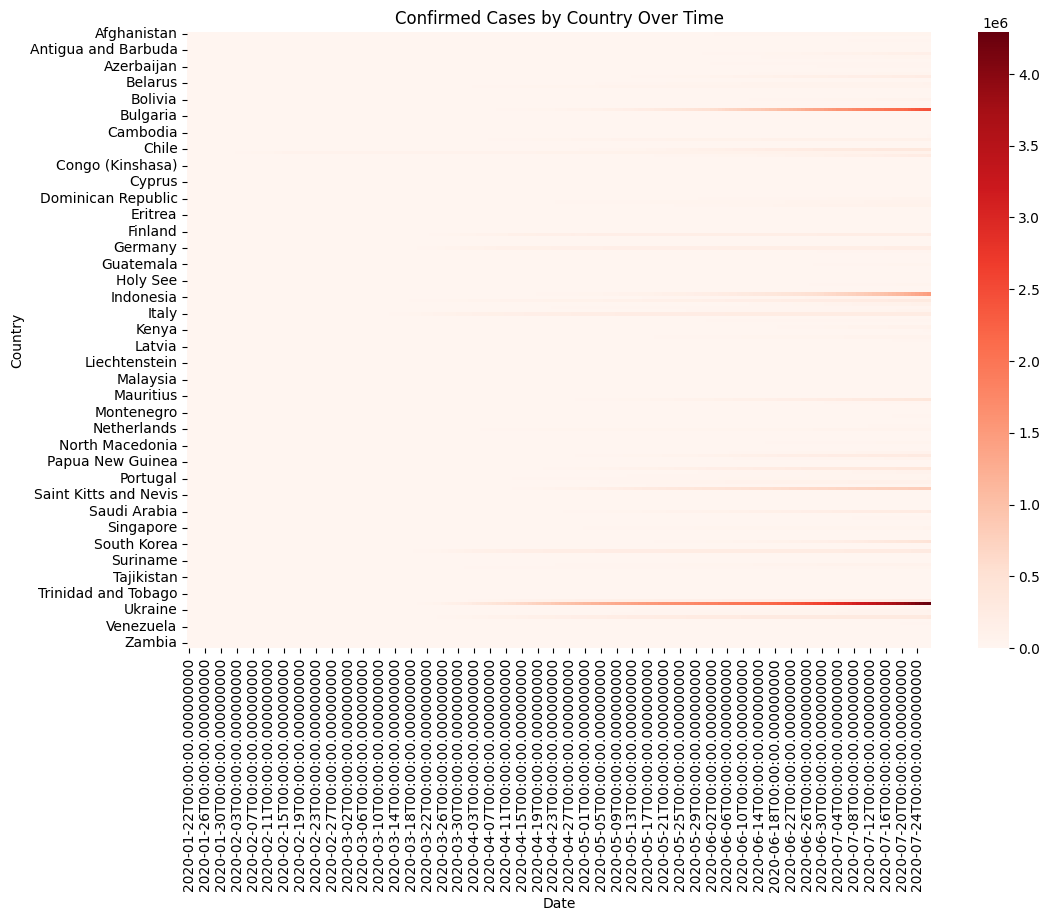

In [17]:
heatmap_data = data.pivot_table(values='Confirmed', index='Country/Region', columns='Date', aggfunc='sum', fill_value=0)
print("Heatmap Data Sample:\n", heatmap_data.head())

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Reds', cbar=True)
plt.title('Confirmed Cases by Country Over Time')
plt.xlabel('Date')
plt.ylabel('Country')
plt.show()

14. Deaths vs Recovered Scatter Plot

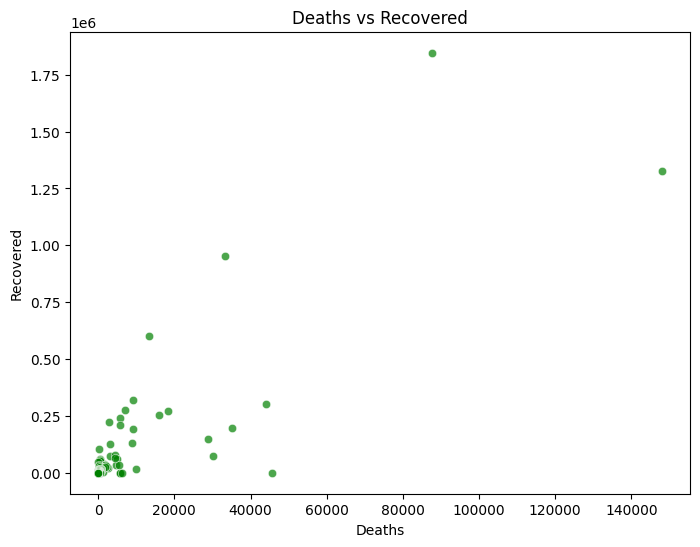

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=country_data, x='Deaths', y='Recovered', alpha=0.7, color='green')
plt.title('Deaths vs Recovered')
plt.xlabel('Deaths')
plt.ylabel('Recovered')
plt.show()


15. Recovery Rate Over Time

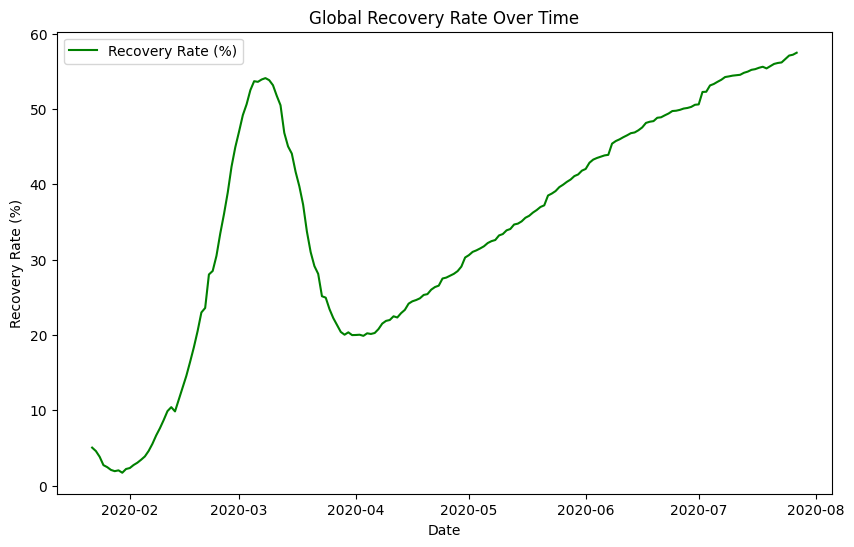

In [19]:
global_data['Recovery Rate'] = (global_data['Recovered'] / global_data['Confirmed']) * 100

plt.figure(figsize=(10, 6))
plt.plot(global_data.index, global_data['Recovery Rate'], label='Recovery Rate (%)', color='green')
plt.title('Global Recovery Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Recovery Rate (%)')
plt.legend()
plt.show()


**MACHINE LEARNING IMPLEMENTATION**

1. Linear Regression: Predict Future Cases

Linear Regression MSE: 18731459432.37229


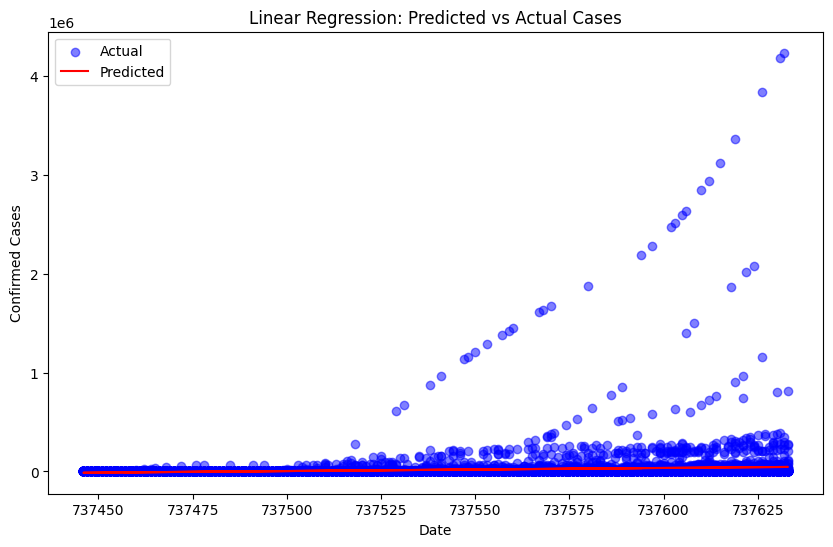

In [20]:
reg_data = data[['Date', 'Confirmed']].copy()
reg_data['Date'] = reg_data['Date'].map(lambda x: x.toordinal())

X = reg_data[['Date']]
y = reg_data['Confirmed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue', alpha=0.5)
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.title('Linear Regression: Predicted vs Actual Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

2. Logistic Regression: Predict High Risk

Logistic Regression Accuracy: 0.9998981047483188
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9710
           1       1.00      0.99      1.00       104

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814



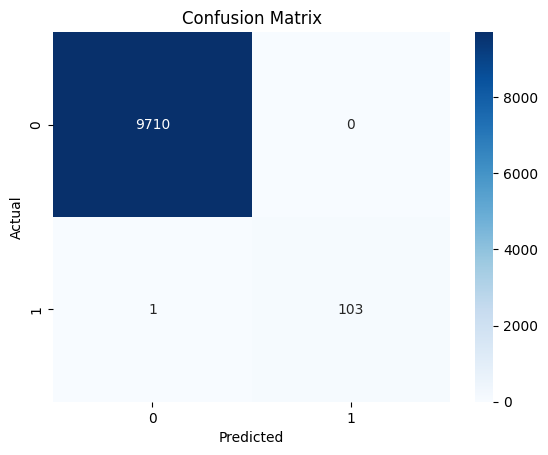

In [21]:
threshold = 100000
data['HighRisk'] = (data['Active'] > threshold).astype(int)

X = data[['Confirmed', 'Deaths', 'Recovered']]
y = data['HighRisk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


3. Decision Tree and Random Forest

Decision Tree Accuracy: 0.9922559608722233
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82       104
           1       1.00      1.00      1.00      9565
           2       0.69      0.88      0.77       145

    accuracy                           0.99      9814
   macro avg       0.90      0.86      0.86      9814
weighted avg       0.99      0.99      0.99      9814



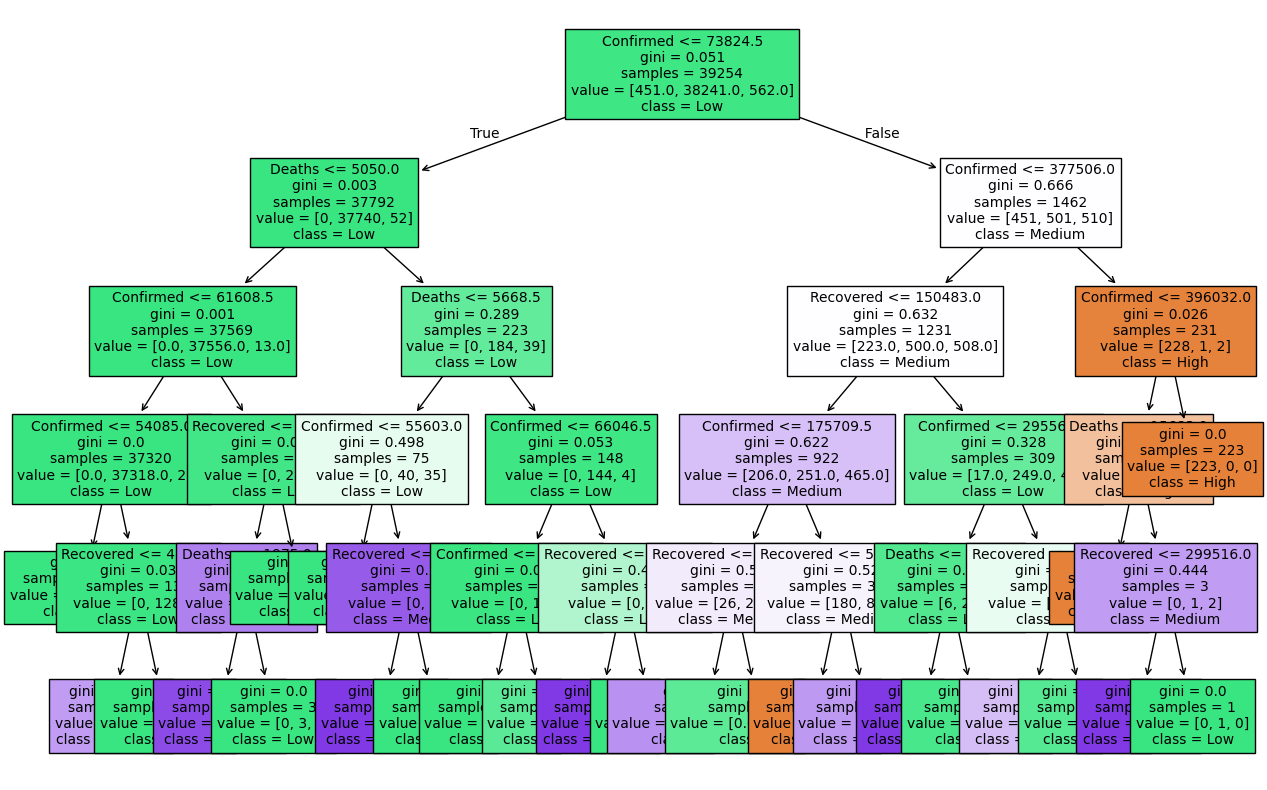

In [22]:
def risk_level(active):
    if active < 50000:
        return 'Low'
    elif active < 100000:
        return 'Medium'
    else:
        return 'High'

data['RiskLevel'] = data['Active'].apply(risk_level)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['RiskLevelEncoded'] = le.fit_transform(data['RiskLevel'])

X = data[['Confirmed', 'Deaths', 'Recovered']]
y = data['RiskLevelEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt_clf, feature_names=X.columns, class_names=le.classes_, filled=True, fontsize=10)
plt.show()